In [1]:
import numpy as np
import rasterio
import pyproj
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from skimage.transform import resize
from pysheds.grid import Grid
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_palette('pastel')

%matplotlib inline

In [2]:
grid = Grid.from_raster('../data/n30w100_dir', data_name='dir')

In [3]:
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

# Specify pour point
x, y = -97.294167, 32.73750

# Delineate the catchment
grid.catchment(data='dir', x=x, y=y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

# Clip the bounding box to the catchment
grid.clip_to('catch')

In [4]:
grid.read_raster('../../../Data/GIS/nlcd_2011_impervious_2011_edition_2014_10_10/nlcd_2011_impervious_2011_edition_2014_10_10.img',
                 data_name='terrain', window=grid.bbox, window_crs=grid.crs)

# Plot windowed impervious area

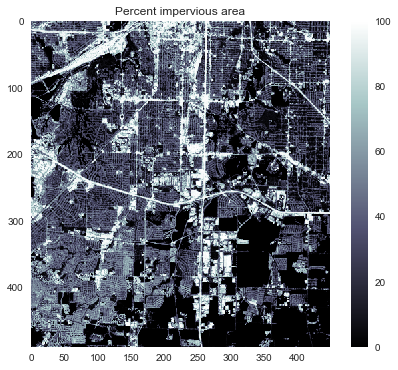

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
plt.imshow(grid.terrain, cmap='bone', zorder=1)
plt.colorbar()
plt.title('Percent impervious area')

# Clip to catchment (nearest neighbor)

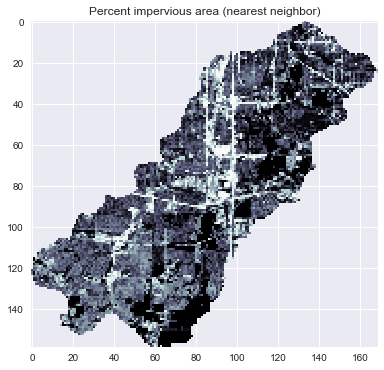

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
interpolated_terrain = grid.view('terrain', nodata=np.nan)
plt.imshow(interpolated_terrain, cmap='bone', zorder=1)
plt.title('Percent impervious area (nearest neighbor)')

# Clip to catchment (linear interpolation)

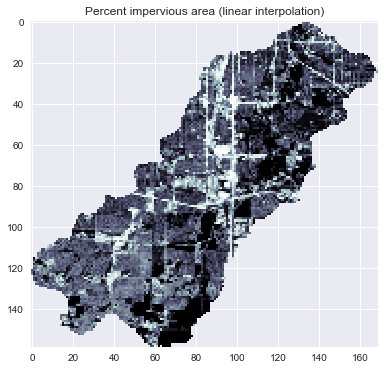

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
interpolated_terrain = grid.view('terrain', interpolation='linear', nodata=np.nan)
plt.imshow(interpolated_terrain, cmap='bone', zorder=1)
plt.title('Percent impervious area (linear interpolation)')

In [8]:
grid.resize('terrain', grid.shape, nodata_in=-1, order=2)

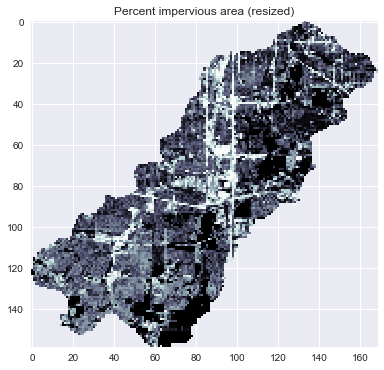

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
interpolated_terrain = grid.view('terrain_resized', nodata=np.nan)
plt.imshow(interpolated_terrain, cmap='bone', zorder=1)
plt.title('Percent impervious area (resized)')